<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/3_3_1_new_data_generation_and_heatmap_for_analisys_MZM_N_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE RESULTS ARE TESTED IN

https://colab.research.google.com/drive/1EU1dDlVmjpHTSvGVl_U3emsOnEeXXvuE#scrollTo=81bFCHH1FM8E

104


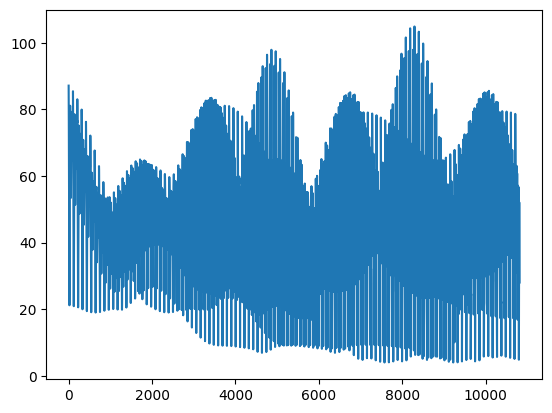

In [1]:
import math
import numpy as np     # library for vector operation
from mpmath import *   # library for bessel functio
import matplotlib.pyplot as plt
from google.colab import files
import csv

# Parâmetros dos moduladores
Vpi_mz1  = 2.4

ts5 = 2*math.sqrt(5)  # 4.4721
noise = 10**-8; noise_dBm = 10*log10(noise)
# PM fixed parameters values
#ang1pm = 0;  Upm1   =  0;        Tpm1  =  (pi*Upm1/Vpi_pm1);

# MZM fixed parameters values
ang1a  = 0;  Umz1a  = Vpi_mz1/2; Th1a  =  (pi*Umz1a/Vpi_mz1);
ang1b  = 0;  Umz1b  =  0;        Th1b  =  (pi*Umz1b/Vpi_mz1);

#up_n  =  up_1 = 27
up_m        =   39
up_act      = up_m
length_flat = 7     # quantidade de linhas comparadas

top_m = int((up_m-1)/2)       # top n(MZ) index, positive values
ind_m = range(-top_m,top_m+1) # range index for MZ

#bot_Amz1a = 2.1;  top_Amz1a =  12.6;   ax_Amz1a = np.arange(bot_Amz1a, top_Amz1a, 0.1)  # top value of Amza
#bot_Amz1b = 2.1;  top_Amz1b =  12.6;   ax_Amz1b = np.arange(bot_Amz1b, top_Amz1b, 0.1)  # top value of Amzb
tp_sup = 12.5
bot_Amz1a = 2.1;  top_Amz1a = tp_sup;   ax_Amz1a = np.arange(bot_Amz1a, top_Amz1a, 0.1)  # top value of Amza
bot_Amz1b = 2.1;  top_Amz1b = tp_sup;   ax_Amz1b = np.arange(bot_Amz1b, top_Amz1b, 0.1)  # top value of Amzb

# ===========================================================================

def reduct_vector(up_act, vec_comb, up_new):
 # up_act = tamanho atual do vector vec_comb
 a = int((up_act-up_new)/2)
 b = int(a + up_new)
 c = int((up_new-1)/2)
 ax_rang = range(-c,c+1)
 ax_new = list(ax_rang)
 new_vcomb = []
 for k in range(a,b):
  new_vcomb.append(vec_comb[k])

 return new_vcomb
#----------------------------------------------------------------------

file = open(f"Data_sec_values_MZM_N_{length_flat}_Ax_{bot_Amz1a}_{top_Amz1a}.csv","a", newline="")
#file = open("csv_Ax_values_MZM.csv","a", newline="")
nv = 0
v_std = []
v_all_values_n_9 = []
v_min_std = []

# ------------- MTX 3D STD values --------{ 1/2
#len_npm = len(ax_Apm1)
len_mza = len(ax_Amz1a)
len_mzb = len(ax_Amz1a)
#m_2d_std = [[0 for i in range(len_mzb)] for i in range(len_mza)]
#ipm = 0
ima = 0
imb = 0
#-----------------------------------------}

m_2d_std = np.zeros((len_mza, len_mzb))
#for iApm in ax_Apm1:

print(len(m_2d_std))


for iAa in ax_Amz1a:  #jAa in y axis
  imb = 0
  for iAb in ax_Amz1b:

    v_mz = []
    temp2 = np.zeros((1,), dtype=complex)
    for m in ind_m:
      J_m_iA1a = besselj(m,iAa)
      #print(J_m_iA1a)
      J_m_iA1b = besselj(m,iAb)
      #print(J_m_iA1b)
      temp2 = J_m_iA1a*exp(j*(m*ang1a + Th1a)) + J_m_iA1b*exp(j*(m*ang1b + Th1b))
      #print(temp2)
      v_mz.append(temp2)

      #---------------------------------------
    temp2 = [abs(k2) for k2 in v_mz]
    pente_osa = np.square(temp2)
    v_analyze = reduct_vector(up_act, pente_osa, length_flat)
    tem_cv = 100*np.std(v_analyze)/np.mean(v_analyze)

    v_std.append(tem_cv)

    a1 = a2 = a3  = 0
    CVmin = 0
    flat  = 0
    CV_2dB = 0
    #limite de planicidade ---------
    men_dB = 10*log10(min(v_analyze))
    mai_dB = 10*log10(max(v_analyze))
    dif_dB = mai_dB - men_dB
    if tem_cv <= 11: #dif_dB <= 2:
      if 1.95 <= dif_dB <= 2:   #dif_dB == 2:
        CVmin = 2
        CV_2dB = tem_cv
      #tem_cv = 90 # para marcar as FRs
      flat = 1
      a1 = 0
      a2 = iAa
      a3 = iAb

    else:
      flat = 0
    #--------------------------------
    #-------------------------------------------------------------------{ 2/2
    m_2d_std[ima, imb] = tem_cv
    imb = imb + 1
    #-------------------------------------------------------------------}

    nv = nv + 1        # contabiliza a quantidade de comb gerados e analisados
    v_temp = []
    v_temp = [nv, round(a1,1), round(iAa,1), round(iAb,1), round(tem_cv,8), round(dif_dB, 2), flat, round(CVmin), a1,a2,a3, round(CV_2dB,2) ]  # preenche um vetor temporal para junttar id Apm, Aa, Ab, std
    #v_all_values1.append(v_temp)                                                 # matriz com os valores anteriores

    writer = csv.writer(file)  # escreve dados
    writer.writerow(v_temp)
  ima = ima + 1
#  ipm = ipm + 1


file.close()

plt.plot(v_std)
plt.show()




##TESTING CODE

Text(0, 0.5, '$A_b$')

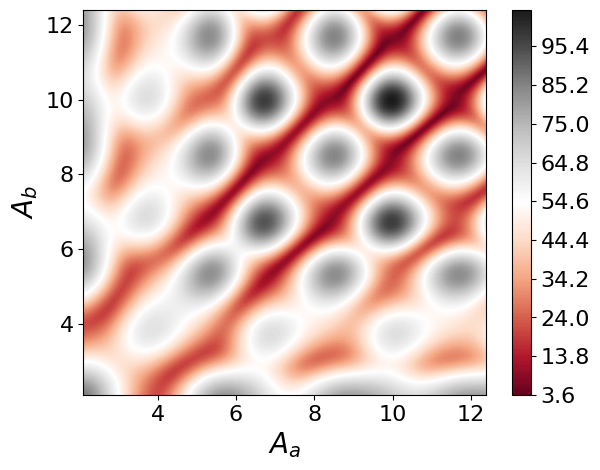

In [2]:
plt.rcParams['font.size']=16
plt.figure(figsize=(6.5,5))
plt.contourf(ax_Amz1a, ax_Amz1a, m_2d_std, 200, cmap='RdGy')
plt.colorbar();
plt.xlabel("$A_a$", fontsize=20)
plt.ylabel("$A_b$", fontsize=20)